# Capstone-Project-aiml
## AIML Online Capstone - Pneumonia Detection Challenge
### Project Objectives
The objective of the project is,  Learn to how to do build an Object Detection Model  Use transfer learning to fine-tune a model.  Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc.  Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.

## The Real Problem
### What is Pneumonia?
Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. Pneumonia accounts for over 15% of all deaths of children under 5 years old internationally. In 2017, 920,000 children under the age of 5 died from the disease. It requires review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams. Pneumonia usually manifests as an area or areas of increased opacity on CXR. However, the diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or postradiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis. CXRs are the most commonly performed diagnostic imaging study. A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift. Pneumonia Detection Now to detection Pneumonia we need to detect Inflammation of the lungs. In this project, you’re challenged to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

### Business Domain Value
Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box. Assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare (eg, radiology). Guided by relevant clinical questions, powerful AI techniques can unlock clinically relevant information hidden in the massive amount of data, which in turn can assist clinical decision making.

### Project Description
In this capstone project, the goal is to build a pneumonia detection system, to locate the position of inflammation in an image. Tissues with sparse material, such as lungs which are full of air, do not absorb the X-rays and appear black in the image. Dense tissues such as bones absorb X-rays and appear white in the image. While we are theoretically detecting “lung opacities”, there are lung opacities that are not pneumonia related. In the data, some of these are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia. Dicom original images:

Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data. Details about the data and dataset files are given in below link, https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

#### Pre-Processing, Data Visualization, EDA
 Exploring the given Data files, classes and images of different classes.  Dealing with missing values  Visualization of different classes  Analysis from the visualization of different classes.

#### Model Building
 Building a pneumonia detection model starting from basic CNN and then improving upon it.  Train the model  To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

#### Test the Model, Fine-tuning and Repeat
 Test the model and report as per evaluation metrics  Try different models  Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc. for these models to fine-tune them  Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

### Reference
Acknowledgment for the datasets. https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements

# Import all necessary libraries

In [ ]:
import math
import os
import shutil
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
!pip install pydicom
import pydicom
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm

     |████████████████████████████████| 1.9MB 14.9MB/s 


# Set the random seed

In [ ]:
random_stat = 123
np.random.seed(random_stat)

# Mount Grive to colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


# Install kaggle to download the dataset

In [ ]:
# Install kaggle to download the dataset
!pip install -q kaggle

In [ ]:
!pwd

/content


In [ ]:
# Ensure you have setup kaggle.json with the required API token and saved it to your google drive mounted above.
# Provide the location of the .kaggle/kagle.json file
kaggle_path = '/content/drive/MyDrive/Colab/.kaggle'
os.chdir(kaggle_path)
!export KAGGLE_CONFIG_DIR=/content/drive/MyDrive/Colab/.kaggle/

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle --version

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Kaggle API 1.5.12


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 6.3MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=32e610a563131aa246dd36598618dda1f9b548343f152d0113cc8bc45a41c07c
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# Kaggle api version should be 1.5.12 or higher
!kaggle --version

Kaggle API 1.5.12


# Set the project path, data path and test path

In [ ]:
project_path = '/content/drive/MyDrive/Colab/CSproject/'
test_path = '/content/drive/MyDrive/Colab/CSproject/dataset/stage_2_test_images/'
os.chdir(project_path) 
data_path = project_path + 'dataset'

In [ ]:
if not os.path.exists(data_path):
    os.makedirs(data_path)
os.chdir(data_path)
!pwd

# Downloading kaggle dataset from Pneumonia detection challenge
file_path = data_path + '/rsna-pneumonia-detection-challenge.zip'
file_path 
if  not os.path.exists(file_path):
  !kaggle competitions download -q -c rsna-pneumonia-detection-challenge

/content/drive/MyDrive/Colab/CS project/dataset


In [ ]:
# Check and set the appropriate data path
os.getcwd()
os.chdir(data_path)

!pwd

/content/drive/MyDrive/Colab/CSproject/dataset


#  Check if the required pneumonia data set is downloaded 



In [ ]:
!ls

rsna-pneumonia-detection-challenge.zip


# Unzip the file

In [ ]:
import zipfile
if not os.path.exists(data_path + '/' + 'stage_2_train_images'):
  zip_ref = zipfile.ZipFile(data_path + '/rsna-pneumonia-detection-challenge.zip', 'r')
  zip_ref.extractall()
  zip_ref.close()

# Load Labels

In [ ]:
labels_df = pd.read_csv(data_path + '/stage_2_train_labels.csv')
det_class_info_df = pd.read_csv(data_path + '/stage_2_detailed_class_info.csv')
# Removing duplicates
det_class_info_df=det_class_info_df.drop_duplicates().reset_index(drop=True)
merged_class_df = labels_df.merge(det_class_info_df, left_on='patientId', right_on='patientId', how='inner')
det_class_info_df['Target'] = det_class_info_df['class'].apply(lambda x: 1 if x =='Lung Opacity' else 0)

In [ ]:
merged_class_df.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


# Visualize Class / Target distribution

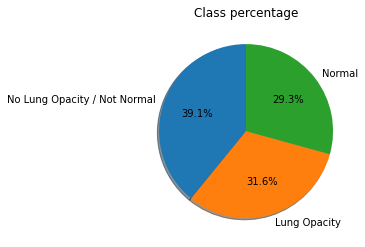

In [ ]:
class_info=merged_class_df["class"].value_counts()
labels = (np.array(class_info.index))
sizes = (np.array((class_info / class_info.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Class percentage")
plt.show()

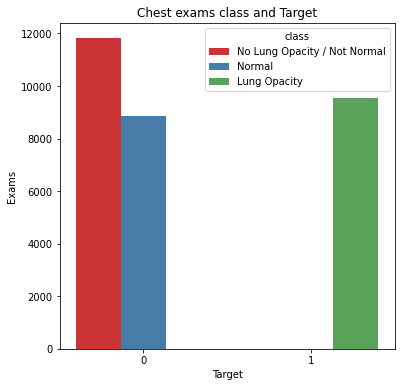

In [ ]:
fig, ax = plt.subplots(nrows=1,figsize=(6,6))
tmp = merged_class_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
sns.barplot(ax=ax,x = 'Target', y='Exams',hue='class',data=df, palette='Set1')
plt.title("Chest exams class and Target")
plt.show()

# Set appropriate criterion to load all classses of data

In [ ]:
# Set the criterion = {} to load all data
criterion={'Lung Opacity':3000, 
           'No Lung Opacity / Not Normal': 600, 
           'Normal': 600}

# Define a function to filter patients by classes 

In [ ]:
def filterPatientsByCriteria(criterion):
    x = 1
    for key in criterion.keys():
      if (x==1):
        filt_class_df = merged_class_df[merged_class_df['class']==key].sample(int(criterion.get(key)))
      else:
        filt_class_df=filt_class_df.append(merged_class_df[merged_class_df['class']==key].sample(int(criterion.get(key))))
      x = x + 1
    return filt_class_df

In [ ]:
# Check and set the appropriate data path
!pwd
os.chdir(data_path)
!pwd

/content/drive/MyDrive/Colab/CS project
/content/drive/MyDrive/Colab/CS project/dataset


In [ ]:
# remove the existing "darknet" folder if any
!rm -r darknet

In [ ]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5934, done.
remote: Total 5934 (delta 0), reused 0 (delta 0), pack-reused 5934
Receiving objects: 100% (5934/5934), 6.35 MiB | 9.19 MiB/s, done.
Resolving deltas: 100% (3924/3924), done.
Checking out files: 100% (979/979), done.


# Remove the Old version of CUDA 

In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-331-updates-uvm' for glob 'nvidi

# Install CUDA  version 9.2 

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2021-06-08 09:51:07--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.16.29
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.16.29|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2021-06-08 09:51:08--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?FgZh-mXgQJt2_NnB8qyrp74m7bXH2CHWV68bV1Wz8i5HKEb2BHpR6SY8rNinsG_gkcQaNsc8pHk_hL3pdm5Emg1Fi8tG0PNaspDdWMt9OYeRVMy

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Jun  7 09:11:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Check and set the current working directory
!pwd
os.chdir(data_path)
!pwd

/content/drive/My Drive/Colab/CSproject/dataset
/content/drive/MyDrive/Colab/CSproject/dataset


In [ ]:
# Build gpu version darknet
!cd darknet && sed '1 s/^.*$/GPU=1/; 2 s/^.*$/CUDNN=1/' -i Makefile


In [ ]:
# -j <The # of cpu cores to use>.
!cd darknet && make -j 1 -s

In [ ]:
# Set the path as appropriate before creating the required directories 
yolo_path = '/content/drive/MyDrive/Colab/CSproject/dataset/'
os.chdir(yolo_path)

# Directory creation

In [ ]:
DATA_DIR = yolo_path

train_dcm_dir = os.path.join(DATA_DIR, "stage_2_train_images")
test_dcm_dir = os.path.join(DATA_DIR, "stage_2_test_images")

img_dir = os.path.join(os.getcwd(), "images")  # .jpg
label_dir = os.path.join(os.getcwd(), "labels")  # .txt
metadata_dir = os.path.join(os.getcwd(), "metadata") # .txt

# YOLOv3 config file directory
cfg_dir = os.path.join(os.getcwd(), "cfg")
# YOLOv3 training checkpoints will be saved here
backup_dir = os.path.join(os.getcwd(), "backup")

for directory in [img_dir, label_dir, metadata_dir, cfg_dir, backup_dir]:
    if os.path.isdir(directory):
        continue
    os.mkdir(directory)

# Check the Directory list

In [ ]:
# Ensure all the directories are created as appropriate

!ls -shtl

total 5.1G
 11M -rw------- 1 root root  11M Jun  7 12:34  train_log.txt
1.9M -rw------- 1 root root 1.9M Jun  7 09:20  darknet_gpu
1.2G -rw------- 1 root root 1.2G Jun  7 09:16  cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
3.5K -rw------- 1 root root 3.2K Jun  7 08:50  darknet.py
4.0K drwx------ 2 root root 4.0K Jun  7 06:23  darknet
4.0K drwx------ 2 root root 4.0K Jun  6 17:29  backup
4.0K drwx------ 2 root root 4.0K Jun  6 17:29  cfg
4.0K drwx------ 2 root root 4.0K Jun  6 17:29  images
4.0K drwx------ 2 root root 4.0K Jun  6 17:29  labels
4.0K drwx------ 2 root root 4.0K Jun  6 17:29  metadata
1.5M -rw------- 1 root root 1.5M Jun  6 17:15  stage_2_train_labels.csv
4.0K drwx------ 2 root root 4.0K Jun  6 17:08  stage_2_train_images
 512 -rw------- 1 root root   55 Jun  6 17:07 'GCP Credits Request Link - RSNA.txt'
1.6M -rw------- 1 root root 1.6M Jun  6 17:07  stage_2_detailed_class_info.csv
156K -rw------- 1 root root 156K Jun  6 17:07  stage_2_sample_submission.csv
4.0K drwx-

# Build annots Data frame that contains all the required details including the bb co-ordinates and target class

In [ ]:
from sklearn.utils import shuffle
filt_class_df = filterPatientsByCriteria(criterion)
filt_class_df = shuffle(filt_class_df)
filt_class_df.reset_index(inplace=True, drop=True)

annots = filt_class_df
annots.head()

,patientId,x,y,width,height,Target,class
0,f49074c2-e73d-4884-804e-a2caab37bcf9,370.0,352.0,219.0,428.0,1,Lung Opacity
1,7a07e772-fa4a-4c0a-97d1-d30bd936a7b1,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,5871bd61-108b-4c53-bc24-c20522d56061,264.0,460.0,150.0,263.0,1,Lung Opacity
3,66ea4259-45e5-4a2e-bb9c-5b649d96feb5,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
4,cb79107c-f66e-4211-8bef-c4f4786a2112,676.0,253.0,348.0,583.0,1,Lung Opacity


In [ ]:
annots

,patientId,x,y,width,height,Target,class
0,f49074c2-e73d-4884-804e-a2caab37bcf9,370.0,352.0,219.0,428.0,1,Lung Opacity
1,7a07e772-fa4a-4c0a-97d1-d30bd936a7b1,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,5871bd61-108b-4c53-bc24-c20522d56061,264.0,460.0,150.0,263.0,1,Lung Opacity
3,66ea4259-45e5-4a2e-bb9c-5b649d96feb5,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
4,cb79107c-f66e-4211-8bef-c4f4786a2112,676.0,253.0,348.0,583.0,1,Lung Opacity
...,...,...,...,...,...,...,...
4195,888dc50a-04f6-4b51-a621-9fa9b374fc0b,NaN,NaN,NaN,NaN,0,Normal
4196,92146ef9-15ba-48b9-ad5a-893a27c6f484,611.0,386.0,224.0,300.0,1,Lung Opacity
4197,f1599b74-dd5c-4a4f-9c6c-1a8d4e4af353,NaN,NaN,NaN,NaN,0,Normal
4198,c39c065c-40fb-4920-9f9a-36ccbb212c0d,269.0,275.0,178.0,356.0,1,Lung Opacity


# Build key functions to extract features and labels 

In [ ]:
# Build key functions to extract features and labels  

def save_img_from_dcm(dcm_dir, img_dir, patient_id):
    img_fp = os.path.join(img_dir, "{}.jpg".format(patient_id))
    if os.path.exists(img_fp):
        return
    dcm_fp = os.path.join(dcm_dir, "{}.dcm".format(patient_id))
    img_1ch = pydicom.read_file(dcm_fp).pixel_array
    img_3ch = np.stack([img_1ch]*3, -1)

    img_fp = os.path.join(img_dir, "{}.jpg".format(patient_id))
    cv2.imwrite(img_fp, img_3ch)
    
def save_label_from_dcm(label_dir, patient_id, row=None):
    # rsna defualt image size
    img_size = 1024
    label_fp = os.path.join(label_dir, "{}.txt".format(patient_id))
    
    f = open(label_fp, "a")
    if row is None:
        f.close()
        return

    top_left_x = row[1]
    top_left_y = row[2]
    w = row[3]
    h = row[4]
    
    # 'r' means relative. 'c' means center.
    rx = top_left_x/img_size
    ry = top_left_y/img_size
    rw = w/img_size
    rh = h/img_size
    rcx = rx+rw/2
    rcy = ry+rh/2
    
    line = "{} {} {} {} {}\n".format(0, rcx, rcy, rw, rh)
    
    f.write(line)
    f.close()
        
def save_yolov3_data_from_rsna(dcm_dir, img_dir, label_dir, annots):
    for row in tqdm(annots.values):
        patient_id = row[0]

        img_fp = os.path.join(img_dir, "{}.jpg".format(patient_id))
        if os.path.exists(img_fp):
            save_label_from_dcm(label_dir, patient_id, row)
            continue

        target = row[5]
        # Excluding Target 0 temporarily 
        if target == 0:
            continue
        save_label_from_dcm(label_dir, patient_id, row)
        save_img_from_dcm(dcm_dir, img_dir, patient_id)

# Execute the above defined functions to Build jpg Images along with the corresponding labels for the training Data 

In [ ]:

# Run the below function to save images (in jpg) and labels in the correspodning folders.

save_yolov3_data_from_rsna(train_dcm_dir, img_dir, label_dir, annots)


100%|██████████| 4200/4200 [22:53<00:00,  3.06it/s]


In [ ]:
!du -sh images labels

427M	images
1.3M	labels


# Plot a sample train image and label 

0 0.46826171875 0.552734375 0.2138671875 0.41796875

0 0.46826171875 0.552734375 0.2138671875 0.41796875



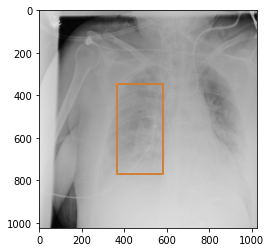

In [ ]:
ex_patient_id = annots[annots.Target == 1].patientId.values[0]
ex_img_path = os.path.join(img_dir, "{}.jpg".format(ex_patient_id))
ex_label_path = os.path.join(label_dir, "{}.txt".format(ex_patient_id))

plt.imshow(cv2.imread(ex_img_path))

img_size = 1014
with open(ex_label_path, "r") as f:
    for line in f:
        print(line)
        class_id, rcx, rcy, rw, rh = list(map(float, line.strip().split()))
        x = (rcx-rw/2)*img_size
        y = (rcy-rh/2)*img_size
        w = rw*img_size
        h = rh*img_size
        plt.plot([x, x, x+w, x+w, x], [y, y+h, y+h, y, y])

0 0.298828125 0.4599609375 0.197265625 0.4375



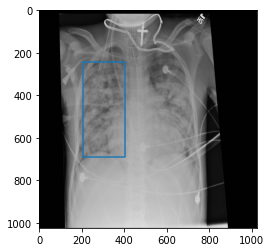

In [ ]:
ex_patient_id = annots[annots.Target == 1].patientId.values[0]
ex_img_path = os.path.join(img_dir, "{}.jpg".format(ex_patient_id))
ex_label_path = os.path.join(label_dir, "{}.txt".format(ex_patient_id))

plt.imshow(cv2.imread(ex_img_path))

img_size = 1014
with open(ex_label_path, "r") as f:
    for line in f:
        print(line)
        class_id, rcx, rcy, rw, rh = list(map(float, line.strip().split()))
        x = (rcx-rw/2)*img_size
        y = (rcy-rh/2)*img_size
        w = rw*img_size
        h = rh*img_size
        plt.plot([x, x, x+w, x+w, x], [y, y+h, y+h, y, y])

# Generate train/val file path list (.txt)

In [ ]:
def write_train_list(metadata_dir, img_dir, name, series):
    list_fp = os.path.join(metadata_dir, name)
    with open(list_fp, "w") as f:
        for patient_id in series:
            line = "{}\n".format(os.path.join(img_dir, "{}.jpg".format(patient_id)))
            f.write(line)

In [ ]:
# Following lines do not contain data with no bbox
patient_id_series = annots[annots.Target == 1].patientId.drop_duplicates()

tr_series, val_series = train_test_split(patient_id_series, test_size=0.1, random_state=random_stat)
print("The # of train set: {}, The # of validation set: {}".format(tr_series.shape[0], val_series.shape[0]))

# train image path list
write_train_list(metadata_dir, img_dir, "tr_list.txt", tr_series)
# validation image path list
write_train_list(metadata_dir, img_dir, "val_list.txt", val_series)

The # of train set: 2356, The # of validation set: 262


# Create a test image and label for YOLO V3

In [ ]:
def save_yolov3_test_data(test_dcm_dir, img_dir, metadata_dir, name, series):
    list_fp = os.path.join(metadata_dir, name)
    with open(list_fp, "w") as f:
        for patient_id in series:
            save_img_from_dcm(test_dcm_dir, img_dir, patient_id)
            line = "{}\n".format(os.path.join(img_dir, "{}.jpg".format(patient_id)))
            f.write(line)

In [ ]:
test_dcm_fps = list(set(glob.glob(os.path.join(test_dcm_dir, '*.dcm'))))
test_dcm_fps = pd.Series(test_dcm_fps).apply(lambda dcm_fp: dcm_fp.strip().split("/")[-1].replace(".dcm",""))
test_dcm_fps = test_dcm_fps.head(420)

save_yolov3_test_data(test_dcm_dir, img_dir, metadata_dir, "te_list.txt", test_dcm_fps)


In [ ]:
test_dcm_fps

0      2cdd3a1a-75d5-45bb-b8b4-0568cadd3f2b
1      c038896c-a4d7-4e16-9cc7-d6a5d89f8012
2      1410b58f-f5df-40e2-a0c5-09c53760006c
3      1c232f78-6d19-4eb9-8dac-06ce1dabc638
4      c1ec035b-377b-416c-a281-f868b7c9b6c3
                       ...                 
415    21f7cfff-d8a5-4585-8dab-8cf4c13d991c
416    045fe561-d85a-4a9e-b0c4-9733f30305c7
417    267e8c40-5334-4761-afd5-37052bf0c1aa
418    2566c9fb-c0e1-4db3-a61a-88ee9e4ba7dd
419    1f7a058d-0e7b-4273-adf0-41bda220208e
Length: 420, dtype: object

# Plot a sample test image - I have used the same image to predict it in the actual test as well

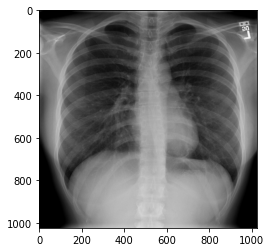

In [ ]:

ex_patient_id = test_dcm_fps[0]
ex_img_path = os.path.join(img_dir, "{}.jpg".format(ex_patient_id))

plt.imshow(cv2.imread(ex_img_path))


# Set up the Config Data as appropriate 

In [ ]:
data_extention_file_path = os.path.join(cfg_dir, 'rsna.data')
with open(data_extention_file_path, 'w') as f:
    contents = """classes= 1
train  = {}
valid  = {}
names  = {}
backup = {}
    """.format(os.path.join(metadata_dir, "tr_list.txt"),
               os.path.join(metadata_dir, "val_list.txt"),
               os.path.join(cfg_dir, 'rsna.names'),
               backup_dir)
    f.write(contents)

In [ ]:
!cat cfg/rsna.data

classes= 1
train  = /content/drive/My Drive/Colab/CS project/dataset/metadata/tr_list.txt
valid  = /content/drive/My Drive/Colab/CS project/dataset/metadata/val_list.txt
names  = /content/drive/My Drive/Colab/CS project/dataset/cfg/rsna.names
backup = /content/drive/My Drive/Colab/CS project/dataset/backup
    

# Download the darknet weights "darknet53.conv.74"

In [ ]:
!wget -q https://pjreddie.com/media/files/darknet53.conv.74

# Set the current working path as appropriate

In [ ]:

!pwd

os.chdir(data_path )

!pwd

/content/drive/My Drive/Colab/CS project
/content/drive/MyDrive/Colab/CS project/dataset


# Train the Yolo V3 model with our filtered RSNA Data. 
##  1. I have used the darknet weights "darknet53.conv.74" for initial training. 
##  2. For additional iterations used the checkpoint weights stored as "backup"

### Key Config parameters used for the training process
1. batch=64
2. subdivisions=32
3. width=608 # used 608 instead of 416 as i read in an article that 608 gives better results
4. height=608 # used 608 instead of 416 as i read in an article that 608 gives better results
5. channels=3
6. momentum=0.9
7. decay=0.0005
8. learning_rate=0.001
9. max_batches = 1000



In [ ]:

! ./darknet/darknet detector train cfg/rsna.data cfg/rsna_yolov3.cfg_train darknet53.conv.74 -i 0 | tee train_log.txt

Streaming output truncated to the last 5000 lines.
Region 82 Avg IOU: 0.735259, Class: 0.992064, Obj: 0.041402, No Obj: 0.000707, .5R: 1.000000, .75R: 0.500000,  count: 2
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000027, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000003, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.499696, Class: 0.992784, Obj: 0.046723, No Obj: 0.000740, .5R: 0.500000, .75R: 0.000000,  count: 2
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000029, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000004, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.708907, Class: 0.993863, Obj: 0.016785, No Obj: 0.000625, .5R: 1.000000, .75R: 0.000000,  count: 1
Region 94 Avg IOU: 0.722016, Class: 0.985379, Obj: 0.019596, No Obj: 0.000062, .5R: 1.000000, .75R: 0.000000,  count: 1
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000003,

# Visualize the Loss vs iterations 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

(0.0, 4.05)

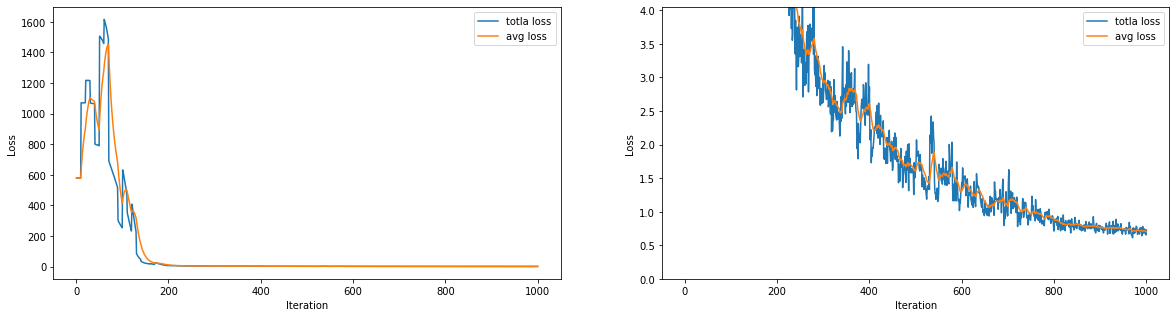

In [ ]:
iters = []
losses = []
total_losses = []
with open("train_log.txt", 'r') as f:
    for i,line in enumerate(f):
        if "images" in line:
            iters.append(int(line.strip().split()[0].split(":")[0]))
            losses.append(float(line.strip().split()[2]))        
            total_losses.append(float(line.strip().split()[1].split(',')[0]))

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.lineplot(iters, total_losses, label="totla loss")
sns.lineplot(iters, losses, label="avg loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(1,2,2)
sns.lineplot(iters, total_losses, label="totla loss")
sns.lineplot(iters, losses, label="avg loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.ylim([0, 4.05])

# Use the above trained model for test Data 

In [ ]:

# use the same test image ploted in the above sections
ex_patient_id = annots[annots.Target == 1].patientId.values[2]
print(ex_patient_id)
shutil.copy(ex_img_path, "test.jpg")
print(ex_patient_id)

cb79107c-f66e-4211-8bef-c4f4786a2112
cb79107c-f66e-4211-8bef-c4f4786a2112


In [ ]:
!ls -alsth backup

total 2.6G
235M -rw------- 1 root root 235M Jun  7 12:34 rsna_yolov3.backup
235M -rw------- 1 root root 235M Jun  7 12:33 rsna_yolov3_final.weights
235M -rw------- 1 root root 235M Jun  7 12:21 rsna_yolov3_900.weights
235M -rw------- 1 root root 235M Jun  7 12:09 rsna_yolov3_800.weights
235M -rw------- 1 root root 235M Jun  7 12:01 rsna_yolov3_700.weights
235M -rw------- 1 root root 235M Jun  7 11:54 rsna_yolov3_600.weights
235M -rw------- 1 root root 235M Jun  7 11:46 rsna_yolov3_500.weights
235M -rw------- 1 root root 235M Jun  7 11:36 rsna_yolov3_400.weights
235M -rw------- 1 root root 235M Jun  7 11:28 rsna_yolov3_300.weights
235M -rw------- 1 root root 235M Jun  7 11:19 rsna_yolov3_200.weights
235M -rw------- 1 root root 235M Jun  7 11:11 rsna_yolov3_100.weights


# Run the Model to test with the "test.jpg" using the saved weights from he above trained model --> Weights used "rsna_yolov3_final.weights" (1000 iterations) 


In [ ]:
! ./darknet detector test ../cfg/rsna.data ../cfg/rsna_yolov3.cfg_test ../backup/rsna_yolov3_final.weights ../test.jpg -thresh 0.005

/bin/bash: ./darknet: Permission denied


In [ ]:
!cd darknet && ./darknet detector test ../cfg/rsna.data ../cfg/rsna_yolov3.cfg_test ../backup/rsna_yolov3_final.weights ../test.jpg -thresh 0.005

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

# Plot the test image along with the prediction for the same

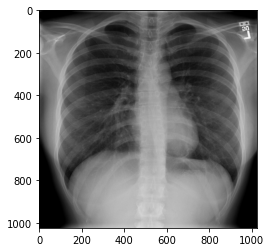

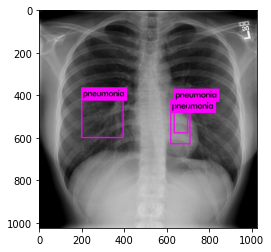

In [ ]:
# Plot the Test Image and Predicted image ----->>>>> Test image Vs Predicted 

ex_patient_id = test_dcm_fps[0]
ex_img_path = os.path.join(img_dir, "{}.jpg".format(ex_patient_id))
ex_label_path = os.path.join(label_dir, "{}.txt".format(ex_patient_id))

plt.imshow(cv2.imread(ex_img_path))
plt.show()

plt.imshow(cv2.imread("./darknet/predictions.jpg"))
plt.show()